# **Object Detection - Models Testing - RF-DETR**

---

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import torch
%matplotlib inline

In [2]:
rfdetr = torch.load("./checkpoint.pth", map_location=torch.device('cpu'), weights_only=False)
rfdetr.model.device = torch.device('cpu')

AttributeError: 'dict' object has no attribute 'model'

In [ ]:
test_image_path = "../../data/split_data/images/test/frame_0_aug_0.jpg"
frame = cv2.imread(test_image_path)
test_image = Image.fromarray(frame)
test_result = rfdetr.predict(test_image, threshold=0.5)
test_result

Detections(xyxy=array([[583.94086, 307.69067, 614.5165 , 335.71243],
       [430.2626 , 260.09073, 458.38275, 290.19278],
       [652.5372 , 287.13712, 679.4236 , 316.30206],
       [472.6942 , 346.48312, 503.1879 , 374.01212],
       [418.69604, 370.98788, 447.95   , 401.27554],
       [573.84064, 258.88846, 602.2039 , 285.6003 ],
       [570.1979 , 441.00653, 602.4702 , 467.50763],
       [640.5797 , 340.93954, 666.51544, 368.69406],
       [438.4147 , 303.64206, 469.3425 , 327.21558],
       [513.2757 , 278.4927 , 542.7899 , 309.02182]], dtype=float32), mask=None, confidence=array([0.9219342 , 0.90680623, 0.89555764, 0.8861188 , 0.88367337,
       0.87234145, 0.86502683, 0.84857136, 0.7048284 , 0.51789916],
      dtype=float32), class_id=array([3, 0, 0, 1, 1, 1, 1, 3, 0, 0]), tracker_id=None, data={}, metadata={})

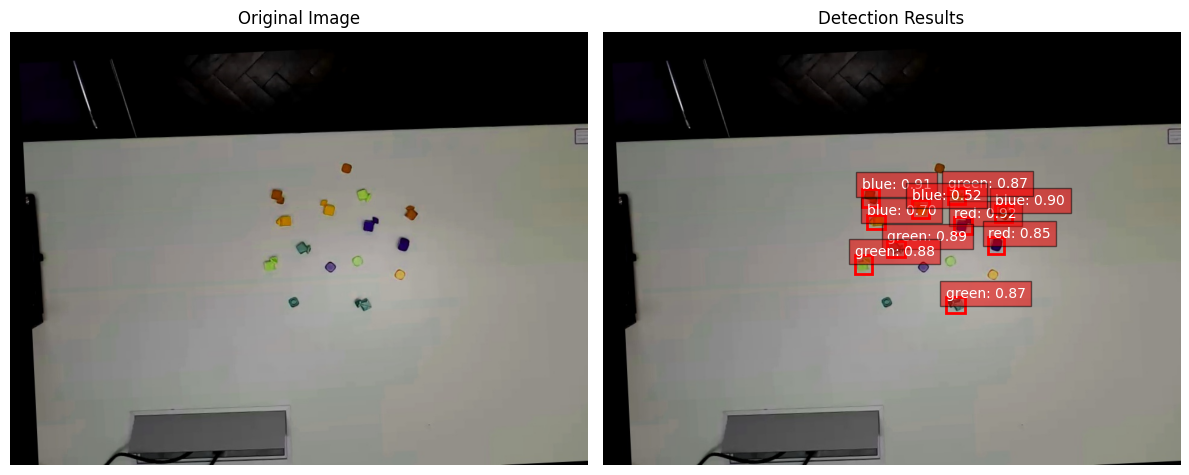

In [ ]:
img = mpimg.imread(test_image_path)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Show image with detection results
axs[1].imshow(img)
for box, cls, conf in zip(
    test_result.xyxy,
    test_result.class_id,
    test_result.confidence,
):
    x1, y1, x2, y2 = box
    axs[1].add_patch(
        plt.Rectangle(
            (x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor="red", linewidth=2
        )
    )
    label = f"{['blue', 'green', 'orange', 'red', 'yellow'][int(cls)]}: {conf:.2f}"
    axs[1].text(
        x1, y1, label, color="white", fontsize=10, bbox=dict(facecolor="red", alpha=0.5)
    )
axs[1].set_title("Detection Results")
axs[1].axis("off")

plt.tight_layout()
plt.show()